In [ ]:
!pip install split-folders

In [ ]:
import keras
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers

from keras.models import Model, Sequential
from keras import layers

import tensorflow as tf

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

100%|██████████| 656M/656M [00:08<00:00, 83.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5


In [ ]:
!mkdir dataset
!mv /root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals/animals/* dataset

In [ ]:
splitfolders.ratio('./dataset/', output='./splited/', seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 5400 files [00:06, 818.23 files/s]


In [ ]:
training_dir="splited/train"
validation_dir="splited/val"
test_dir="splited/test"

def prep_data(augmented,batch_size=16):
    if augmented:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

        validation_datagen = ImageDataGenerator(rescale=1./255)
        test_datagen = ImageDataGenerator(rescale=1./255)

    else:
        train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    train_set = train_datagen.flow_from_directory(
        training_dir,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode="sparse")


    validation_set = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode="sparse")

    test_set = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode="sparse")

    return train_set , validation_set, test_set


In [ ]:
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].grid(True)
    axs[0].legend()

    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.show()


In [ ]:
train_set,validation_set,test_set=prep_data(False)

images, labels = next(train_set)

class_names = train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

Found 4320 images belonging to 90 classes.
Found 540 images belonging to 90 classes.
Found 540 images belonging to 90 classes.


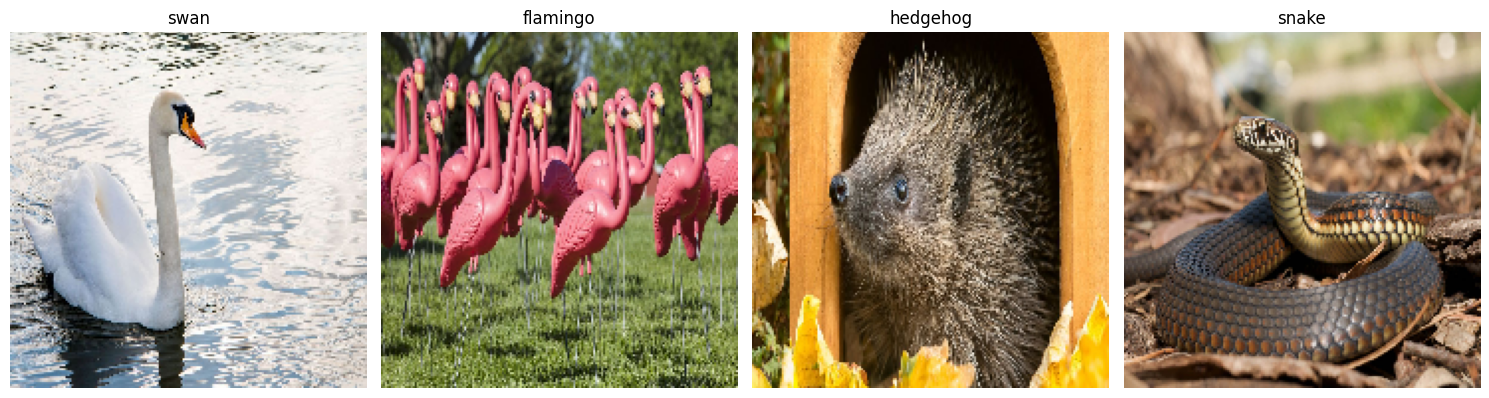

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    axes[i].imshow(images[i])
    label_index = int(labels[i])
    class_name = class_names[label_index]
    axes[i].set_title(f"{class_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
train_set,validation_set,test_set=prep_data(True)

images,labels=next(train_set)

class_names = train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

Found 4320 images belonging to 90 classes.
Found 540 images belonging to 90 classes.
Found 540 images belonging to 90 classes.


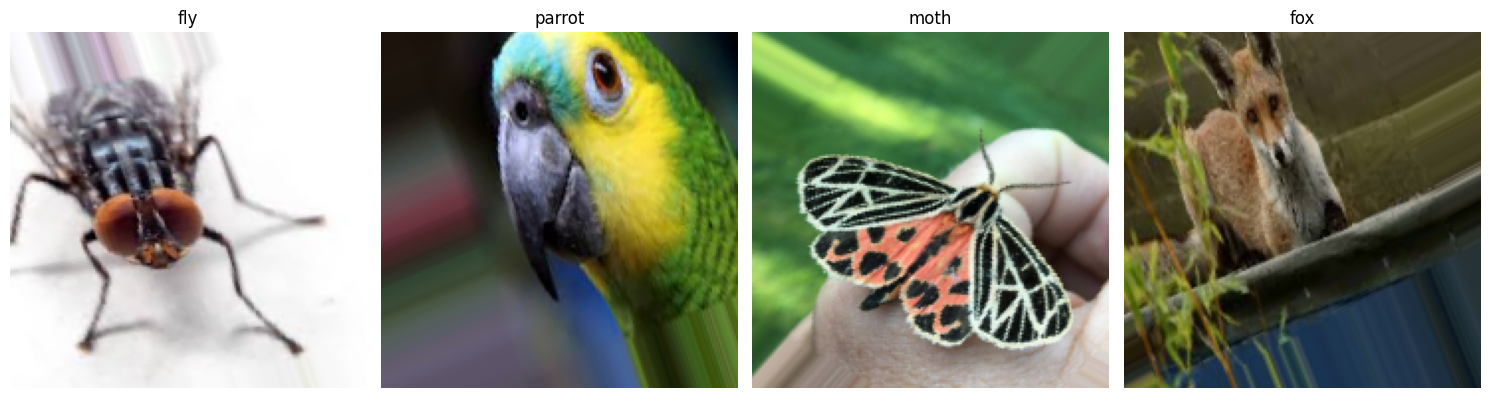

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    axes[i].imshow(images[i])
    label_index = int(labels[i])
    class_name = class_names[label_index]
    axes[i].set_title(f"{class_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import os
import matplotlib.pyplot as plt

train_dir = training_dir
validation_dir = validation_dir
test_dir = test_dir

train_class_counts = {}
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        train_class_counts[class_folder] = num_images

validation_class_counts = {}
for class_folder in os.listdir(validation_dir):
    class_path = os.path.join(validation_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        validation_class_counts[class_folder] = num_images

test_class_counts = {}
for class_folder in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        test_class_counts[class_folder] = num_images

print("Training set Distribution:")
print(train_class_counts)

print("Validation set Distribution:")
print(validation_class_counts)

print("Test set Distribution:")
print(test_class_counts)

Training set Distribution:
{'orangutan': 48, 'reindeer': 48, 'sheep': 48, 'okapi': 48, 'duck': 48, 'crow': 48, 'elephant': 48, 'beetle': 48, 'octopus': 48, 'hamster': 48, 'dragonfly': 48, 'seahorse': 48, 'fly': 48, 'coyote': 48, 'wombat': 48, 'crab': 48, 'lobster': 48, 'turtle': 48, 'flamingo': 48, 'shark': 48, 'hyena': 48, 'kangaroo': 48, 'butterfly': 48, 'possum': 48, 'hare': 48, 'horse': 48, 'chimpanzee': 48, 'hummingbird': 48, 'swan': 48, 'hornbill': 48, 'hippopotamus': 48, 'owl': 48, 'badger': 48, 'grasshopper': 48, 'bison': 48, 'pelecaniformes': 48, 'dog': 48, 'mouse': 48, 'goose': 48, 'wolf': 48, 'penguin': 48, 'pig': 48, 'squirrel': 48, 'cow': 48, 'pigeon': 48, 'lizard': 48, 'panda': 48, 'bat': 48, 'whale': 48, 'caterpillar': 48, 'sparrow': 48, 'antelope': 48, 'starfish': 48, 'boar': 48, 'fox': 48, 'dolphin': 48, 'snake': 48, 'bee': 48, 'hedgehog': 48, 'woodpecker': 48, 'cockroach': 48, 'goldfish': 48, 'zebra': 48, 'porcupine': 48, 'lion': 48, 'leopard': 48, 'parrot': 48, 'seal

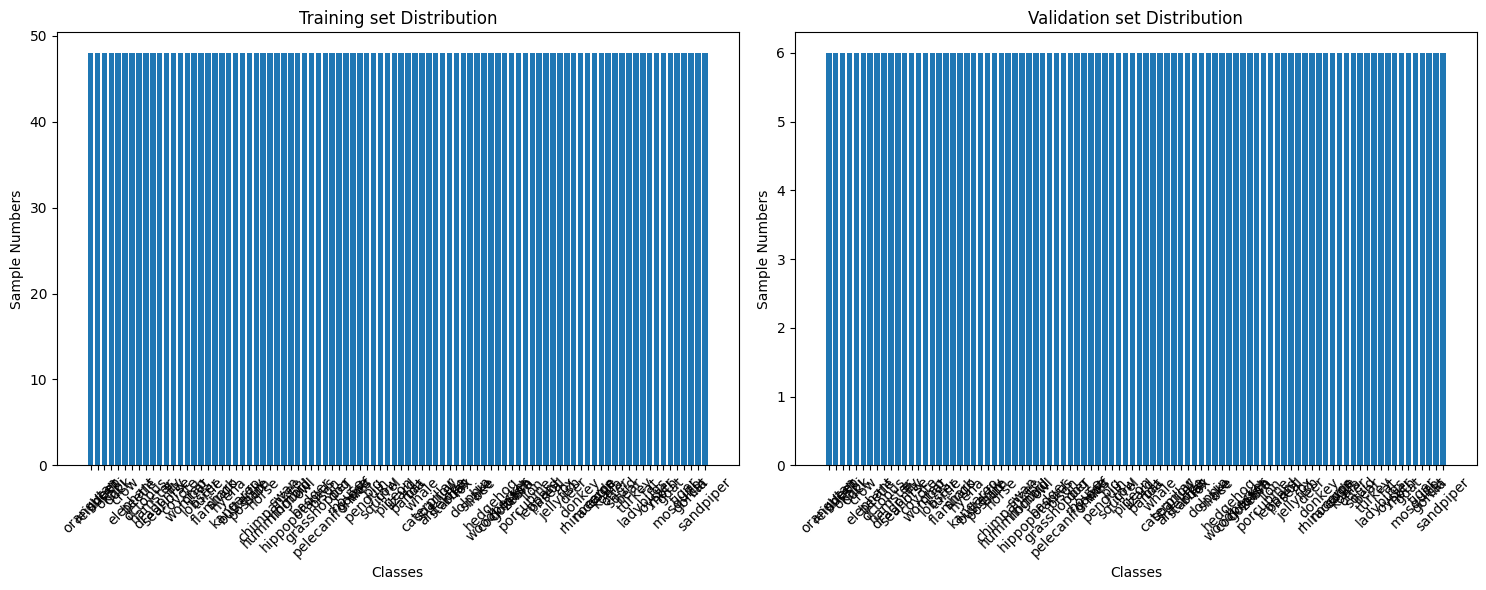

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.title('Training set Distribution')
plt.xlabel('Classes')
plt.ylabel('Sample Numbers')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(validation_class_counts.keys(), validation_class_counts.values())
plt.title('Validation set Distribution')
plt.xlabel('Classes')
plt.ylabel('Sample Numbers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

classes distributed evenly

In [ ]:
len(class_names)

90

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception

In [ ]:
train_set,validation_set,test_set=prep_data(True,batch_size=16)

Found 4320 images belonging to 90 classes.
Found 540 images belonging to 90 classes.
Found 540 images belonging to 90 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in base_model.layers[:-25]:
     layer.trainable = False

base_model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 180, 180, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 89, 89, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 89, 89, 32)     │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 89, 89, 32)     │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 87, 87, 64)     │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 87, 87, 64)     │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 87, 87, 64)     │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 87, 87, 128)    │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 87, 87, 128)    │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 87, 87, 128)    │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 87, 87, 128)    │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 87, 87, 128)    │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 44, 44, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 44, 44, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 8,402,360 (32.05 MB)

 Non-trainable params: 12,459,120 (47.53 MB)

In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(90, activation='softmax'))

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 6, 6, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       9,437,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 90)                  │          23,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,354,946 (115.79 MB)

 Trainable params: 17,895,826 (68.27 MB)

 Non-trainable params: 12,459,120 (47.53 MB)

In [ ]:
train_history = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


270/270 ━━━━━━━━━━━━━━━━━━━━ 95s 268ms/step - accuracy: 0.0400 - loss: 4.4249 - val_accuracy: 0.4741 - val_loss: 2.7712
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 116s 228ms/step - accuracy: 0.2295 - loss: 3.3894 - val_accuracy: 0.7000 - val_loss: 1.5560
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 63s 229ms/step - accuracy: 0.4278 - loss: 2.4767 - val_accuracy: 0.7556 - val_loss: 0.9664
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 82s 229ms/step - accuracy: 0.5097 - loss: 2.0561 - val_accuracy: 0.7944 - val_loss: 0.7849
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 63s 231ms/step - accuracy: 0.5899 - loss: 1.7040 - val_accuracy: 0.8259 - val_loss: 0.6614
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 81s 227ms/step - accuracy: 0.6422 - loss: 1.4306 - val_accuracy: 0.8389 - val_loss: 0.5702
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 82s 229ms/step - accuracy: 0.6959 - loss: 1.2294 - val_accuracy: 0.8519 - val_loss: 0.5644
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 83s 235ms/step - accuracy: 0.7250 - loss: 1.1344 - va

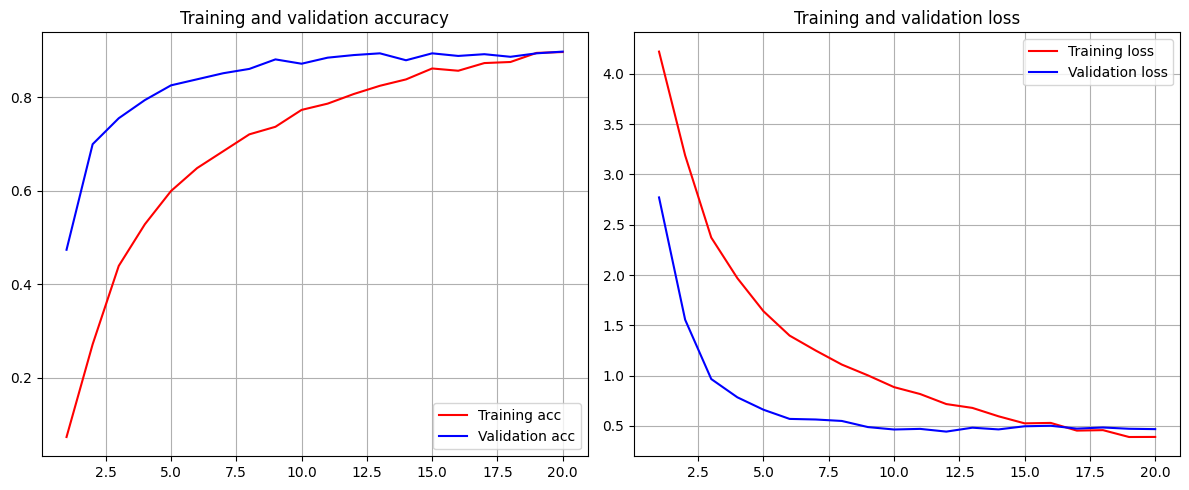

In [ ]:
visualize(train_history)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.8947 - loss: 0.6693
Test Accuracy: 90.74%
Test Loss: 0.4739


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the test data
y_pred = model.predict(test_set)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Get true labels
y_true = test_set.classes  # Ground truth labels

34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 182ms/step


In [ ]:
report = classification_report(y_true, y_pred_classes, target_names=test_set.class_indices.keys())
print("Classification Report:\n", report)

Classification Report:
                 precision    recall  f1-score   support

      antelope       0.00      0.00      0.00         6
        badger       0.00      0.00      0.00         6
           bat       0.00      0.00      0.00         6
          bear       0.00      0.00      0.00         6
           bee       0.00      0.00      0.00         6
        beetle       0.00      0.00      0.00         6
         bison       0.00      0.00      0.00         6
          boar       0.00      0.00      0.00         6
     butterfly       0.00      0.00      0.00         6
           cat       0.00      0.00      0.00         6
   caterpillar       0.00      0.00      0.00         6
    chimpanzee       0.00      0.00      0.00         6
     cockroach       0.00      0.00      0.00         6
           cow       0.00      0.00      0.00         6
        coyote       0.00      0.00      0.00         6
          crab       0.14      0.17      0.15         6
          crow       0.

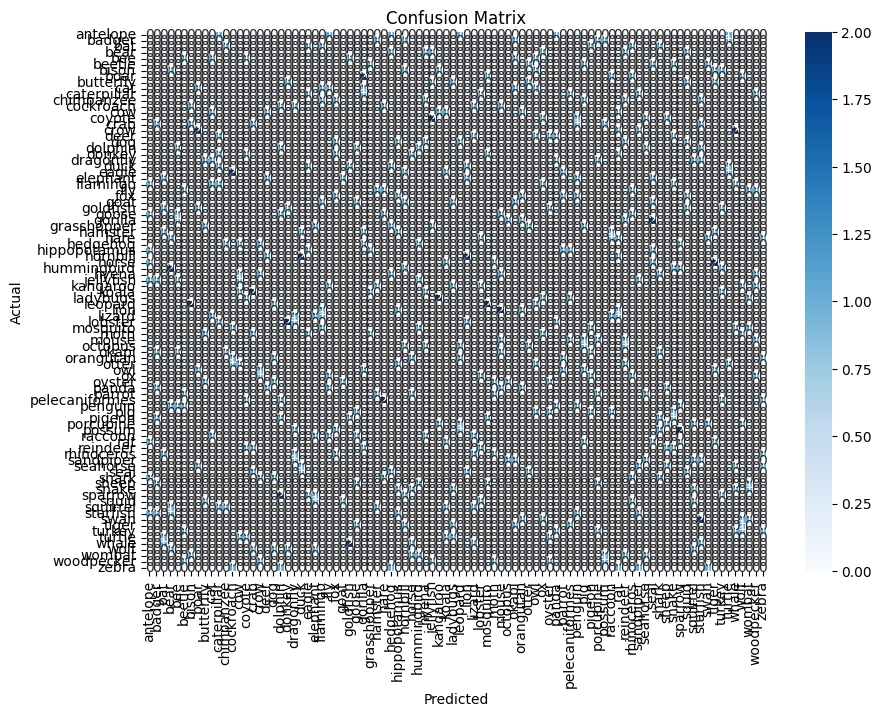

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("model.h5")